**Step 1: Load and Explore the Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("sales_data.csv")
df.head()

,Customer_ID,Transaction_ID,Product_Category,Product_Name,Quantity_Purchased,Purchase_Amount,Discount_Percentage,Final_Price,Purchase_Date,Payment_Method,Customer_Age,Customer_Gender,Region
0,1,T00001,Headphones,Bose 700,1,1168.87,22.01,911.60,3/19/2024,Debit Card,64,Male,South America
1,2,T00002,Headphones,AirPods Pro,8,659.06,4.12,631.91,3/11/2023,Credit Card,31,Male,North America
2,3,T00003,TV,LG OLED,8,1776.47,0.57,1766.34,11/8/2024,PayPal,26,Male,Asia
3,4,T00004,Smartwatch,Apple Watch Series 7,7,1877.17,29.35,1326.22,9/8/2023,Credit Card,26,Female,Europe
4,5,T00005,Headphones,Bose 700,3,2257.90,17.05,1872.93,10/30/2023,Credit Card,57,Male,Europe


In [3]:
# Showing basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          1000 non-null   int64  
 1   Transaction_ID       1000 non-null   object 
 2   Product_Category     1000 non-null   object 
 3   Product_Name         1000 non-null   object 
 4   Quantity_Purchased   1000 non-null   int64  
 5   Purchase_Amount      1000 non-null   float64
 6   Discount_Percentage  1000 non-null   float64
 7   Final_Price          1000 non-null   float64
 8   Purchase_Date        1000 non-null   object 
 9   Payment_Method       1000 non-null   object 
 10  Customer_Age         1000 non-null   int64  
 11  Customer_Gender      1000 non-null   object 
 12  Region               1000 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 101.7+ KB


In [4]:
#getting an overview of numerical columns:
df.describe()

,Customer_ID,Quantity_Purchased,Purchase_Amount,Discount_Percentage,Final_Price,Customer_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.487000,1542.229580,15.207080,1309.095270,44.268000
std,288.819436,2.854817,849.568747,8.575756,736.775731,14.954391
min,1.000000,1.000000,51.170000,0.030000,41.740000,18.000000
25%,250.750000,3.000000,826.390000,7.870000,700.525000,31.750000
50%,500.500000,6.000000,1507.150000,15.120000,1279.450000,45.000000
75%,750.250000,8.000000,2274.905000,22.655000,1938.957500,57.000000
max,1000.000000,10.000000,2999.570000,29.980000,2924.090000,70.000000


**Step 2: Data Cleaning and preprocessing**

In [5]:
#checking missing values
df.isnull().sum()
#there are no missing values in our data

,0
Customer_ID,0
Transaction_ID,0
Product_Category,0
Product_Name,0
Quantity_Purchased,0
Purchase_Amount,0
Discount_Percentage,0
Final_Price,0
Purchase_Date,0
Payment_Method,0


In [6]:
#checking duplicates
df.duplicated().sum()
#no duplicated values

0

In [7]:
#Checking Incorrect Data Types
df.dtypes

,0
Customer_ID,int64
Transaction_ID,object
Product_Category,object
Product_Name,object
Quantity_Purchased,int64
Purchase_Amount,float64
Discount_Percentage,float64
Final_Price,float64
Purchase_Date,object
Payment_Method,object


In [8]:
#Purchase_Date column must be converted to datetime
df['Purchase_Date']= pd.to_datetime(df['Purchase_Date'])
df.dtypes

,0
Customer_ID,int64
Transaction_ID,object
Product_Category,object
Product_Name,object
Quantity_Purchased,int64
Purchase_Amount,float64
Discount_Percentage,float64
Final_Price,float64
Purchase_Date,datetime64[ns]
Payment_Method,object


In [9]:
#Extract Useful Columns
df['Year'] = df['Purchase_Date'].dt.year
df['Month'] = df['Purchase_Date'].dt.month
df['Revnue'] = df['Quantity_Purchased'] * df['Final_Price']
df.head()

,Customer_ID,Transaction_ID,Product_Category,Product_Name,Quantity_Purchased,Purchase_Amount,Discount_Percentage,Final_Price,Purchase_Date,Payment_Method,Customer_Age,Customer_Gender,Region,Year,Month,Revnue
0,1,T00001,Headphones,Bose 700,1,1168.87,22.01,911.60,2024-03-19,Debit Card,64,Male,South America,2024,3,911.60
1,2,T00002,Headphones,AirPods Pro,8,659.06,4.12,631.91,2023-03-11,Credit Card,31,Male,North America,2023,3,5055.28
2,3,T00003,TV,LG OLED,8,1776.47,0.57,1766.34,2024-11-08,PayPal,26,Male,Asia,2024,11,14130.72
3,4,T00004,Smartwatch,Apple Watch Series 7,7,1877.17,29.35,1326.22,2023-09-08,Credit Card,26,Female,Europe,2023,9,9283.54
4,5,T00005,Headphones,Bose 700,3,2257.90,17.05,1872.93,2023-10-30,Credit Card,57,Male,Europe,2023,10,5618.79


In [20]:
df.rename(columns={'Revenue': 'Sales'}, inplace=True)
df.head()

,Customer_ID,Transaction_ID,Product_Category,Product_Name,Quantity_Purchased,Purchase_Amount,Discount_Percentage,Final_Price,Purchase_Date,Payment_Method,Customer_Age,Customer_Gender,Region,Year,Month,Sales
0,1,T00001,Headphones,Bose 700,1,1168.87,22.01,911.60,2024-03-19,Debit Card,64,Male,South America,2024,3,911.60
1,2,T00002,Headphones,AirPods Pro,8,659.06,4.12,631.91,2023-03-11,Credit Card,31,Male,North America,2023,3,5055.28
2,3,T00003,TV,LG OLED,8,1776.47,0.57,1766.34,2024-11-08,PayPal,26,Male,Asia,2024,11,14130.72
3,4,T00004,Smartwatch,Apple Watch Series 7,7,1877.17,29.35,1326.22,2023-09-08,Credit Card,26,Female,Europe,2023,9,9283.54
4,5,T00005,Headphones,Bose 700,3,2257.90,17.05,1872.93,2023-10-30,Credit Card,57,Male,Europe,2023,10,5618.79


In [27]:
df['Product_Name'].unique()

array(['Bose 700', 'AirPods Pro', 'LG OLED', 'Apple Watch Series 7',
       'Sony WH-1000XM4', 'iPhone 13', 'HP Spectre x360', 'MacBook Pro',
       'Sony Bravia', 'Google Pixel 6', 'Samsung Galaxy Watch 4',
       'Samsung Galaxy S22', 'Dell XPS 15', 'Samsung QLED',
       'Garmin Forerunner'], dtype=object)

**Analysis Questions Phase**

#1- Sales Performance Analysis Questions :


In [21]:
df['Year'].unique()

array([2024, 2023, 2025], dtype=int32)

In [11]:
#What is the total revenue over Years?
sales_over_years = df.groupby('Year')['Sales'].sum()
sales_over_years

,Revenue
Year,
2023,2813288.54
2024,3672686.12
2025,658517.08


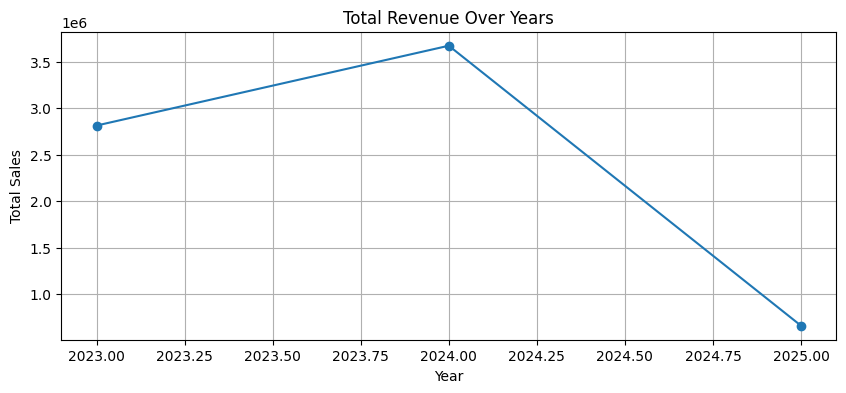

In [23]:
plt.figure(figsize=(10, 4))
sales_over_years.plot(marker='o', linestyle='-')
plt.title("Total Revenue Over Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [25]:
df_filtered = df[df['Year'].isin([2023, 2024])]

monthly_sales = df_filtered.groupby(['Month', 'Year'])['Sales'].sum().unstack()
monthly_sales

Year,2023,2024
Month,,
1,NaN,286726.95
2,33180.56,303744.00
3,284866.56,317203.26
4,298358.98,228476.30
5,430390.17,206740.89
6,239737.95,437659.86
7,261321.95,301106.59
8,226858.12,264609.57
9,255801.30,351032.23


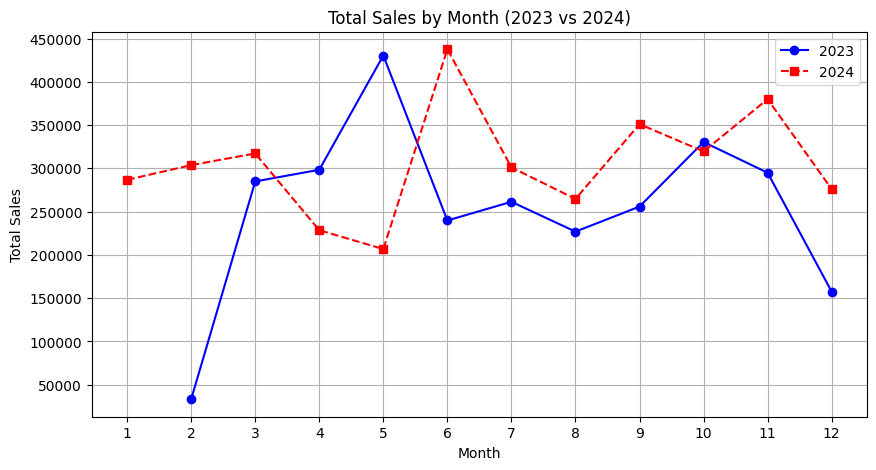

In [26]:
#Which months have the highest sales?
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales[2023], marker='o', linestyle='-', label='2023', color='b')
plt.plot(monthly_sales.index, monthly_sales[2024], marker='s', linestyle='--', label='2024', color='r')
plt.title("Total Sales by Month (2023 vs 2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))  # Ensure x-axis is from 1 to 12 for months
plt.legend()
plt.grid(True)
plt.show()

In [29]:
#Which products generate the most sales?
# here we can know top 10 or top 5 products
df['Product_Name'].nunique() #--15
product_revenue = df.groupby('Product_Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
product_revenue

,Product_Name,Sales
4,Garmin Forerunner,634492.35
10,Samsung Galaxy Watch 4,555462.57
3,Dell XPS 15,554437.11
8,MacBook Pro,539604.83
6,HP Spectre x360,532751.99
11,Samsung QLED,518208.07
14,iPhone 13,504504.60
0,AirPods Pro,465446.18
9,Samsung Galaxy S22,440357.38
13,Sony WH-1000XM4,438529.19


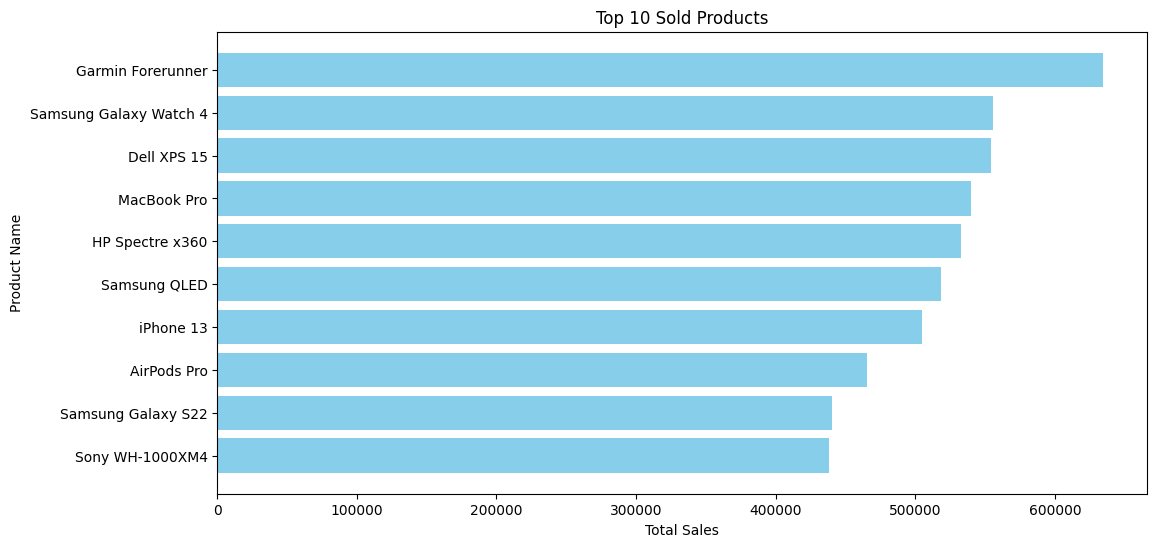

In [35]:
## Select top 10 products for visualization
top_10 = product_revenue.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_10['Product_Name'], top_10['Sales'], color='skyblue')
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 10 Sold Products")
plt.gca().invert_yaxis()  # Invert to show highest at the top
plt.show()

In [17]:
#Which regions contribute the most to sales?
top_region = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Revenue', ascending=False)
top_region

,Region,Revenue
3,North America,1659570.79
4,South America,1613387.45
0,Africa,1359866.80
2,Europe,1339810.43
1,Asia,1171856.27


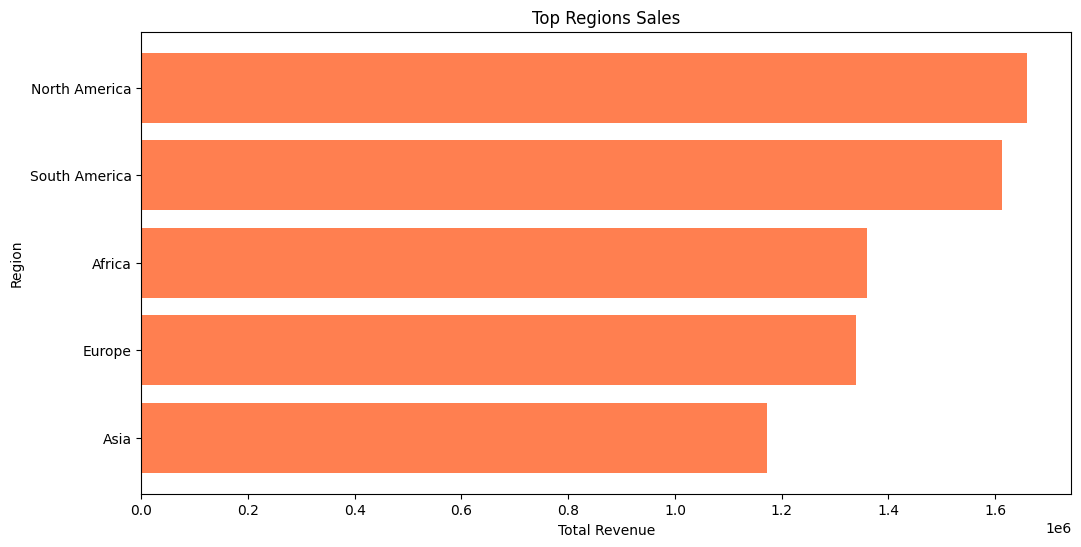

In [38]:
plt.figure(figsize=(12, 6))
plt.barh(top_region['Region'], top_region['Revenue'], color = 'coral')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.title('Top Regions Sales')
plt.gca().invert_yaxis()
plt.show()